## Results from coordination games

In [1]:
import pandas as pd
import numpy as np
import mesa
import random
import matplotlib.pyplot as plt
import seaborn as sns

# Graphs font
plt.rcParams['font.family'] = 'Georgia'
color_dict = {
    'Anti - environment': 'orange',
    'Neutral': 'blue',
    'Pro - environment': 'green'
}

In [2]:
# Import the game
from coordination_game import coordination_agent, coordination_model

In [3]:
# Set the number of agents and other parameters
N = 500  # Number of agents
lambda1 = 0.95
lambda2 = 0
convincement_type = "ticker"  # Placeholder since you're ignoring this for now

# Initialize the model
model = coordination_model(N, lambda1, lambda2, convincement_type, steps_convincement=5)

# Run the model for a specified number of steps
num_steps = 100
for i in range(num_steps):
    model.step()

# After running, you can access agent data for analysis
for agent in model.schedule.agents[256:258]:
    print(f"Agent {agent.unique_id}:")
    print(f"  Group: {agent.assigned_group}")
    print(f"  Consumption History: {agent.history}")
    print(f"  Utilities: {agent.utilities}")


Agent 352:
  Group: Neutral
  Consumption History: [67.45315312971046, 95.6025081575126, 58.3305968002571, 58.3305968002571, 58.3305968002571, 58.369920675157545, 93.91913753924257, 53.32481341817888, 53.32481341817888, 54.04464525967214, 62.18129554527664, 49.49739361842052, 62.18129554527664, 62.18129554527664, 62.18129554527664, 62.18129554527664, 62.18129554527664, 49.49739361842052, 53.217915264987, 53.217915264987, 53.717915264986914, 53.717915264986914, 53.717915264986914, 53.717915264986914, 53.717915264986914, 55.217915264987425, 55.217915264987425, 55.217915264987425, 57.717915264986885, 57.717915264986885, 57.717915264986885, 57.717915264986885, 57.717915264986885, 50.7381911803036, 50.7381911803036, 55.73819118030434, 55.73819118030434, 55.73819118030434, 55.73819118030434, 55.73819118030434, 55.73819118030434, 57.73819118030406, 57.73819118030406, 57.73819118030406, 59.73819118030363, 59.73819118030363, 59.73819118030363, 58.54583341965167, 58.54583341965167, 60.5458334196

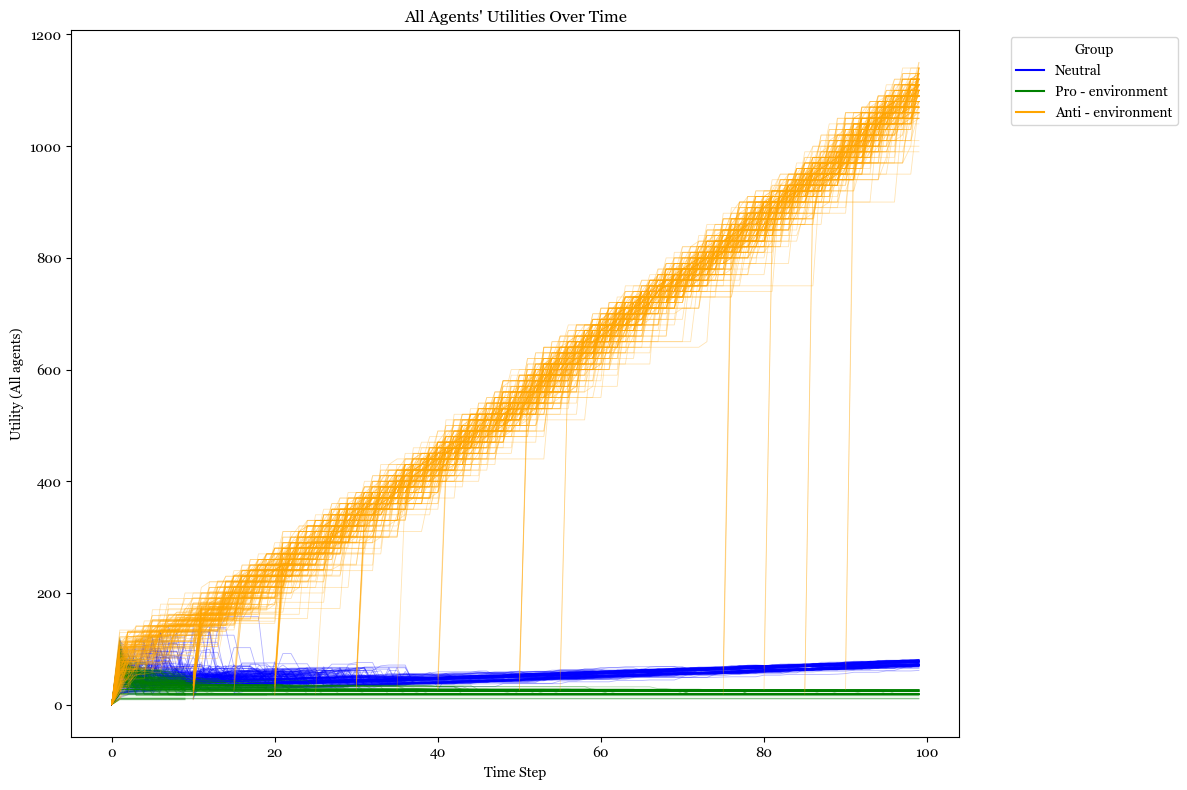

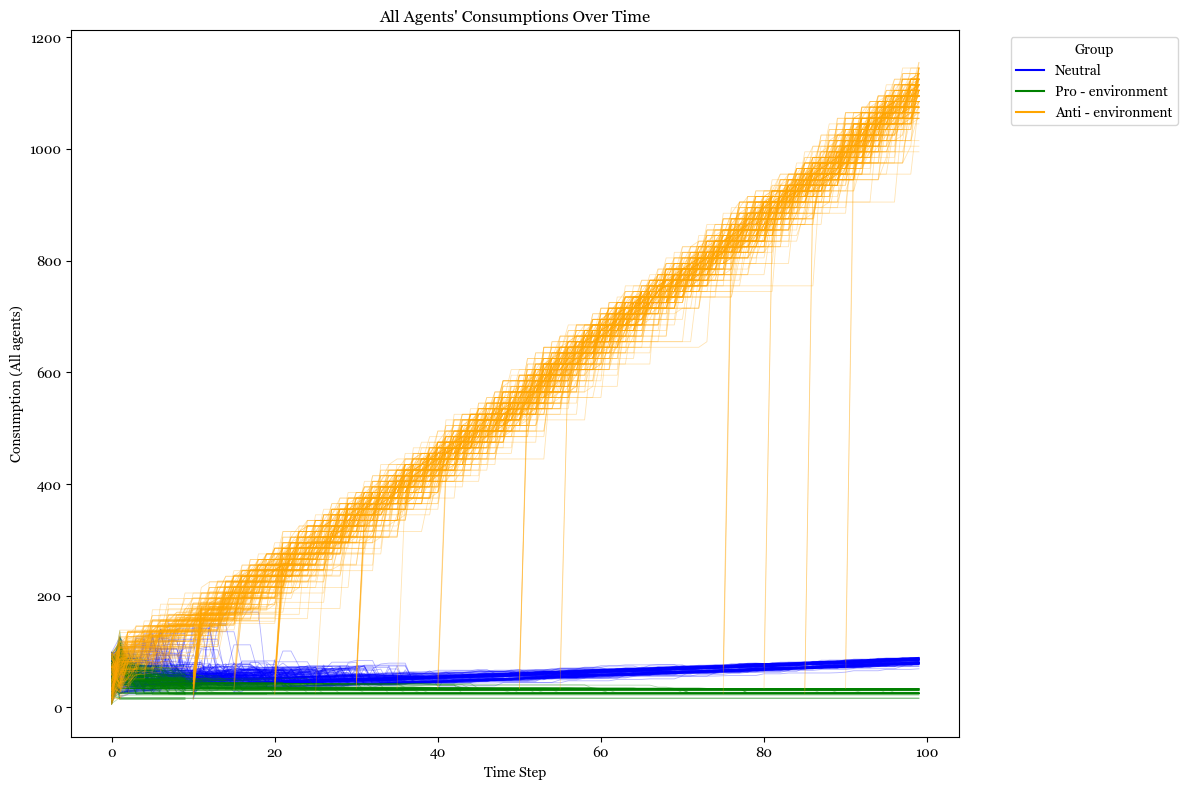

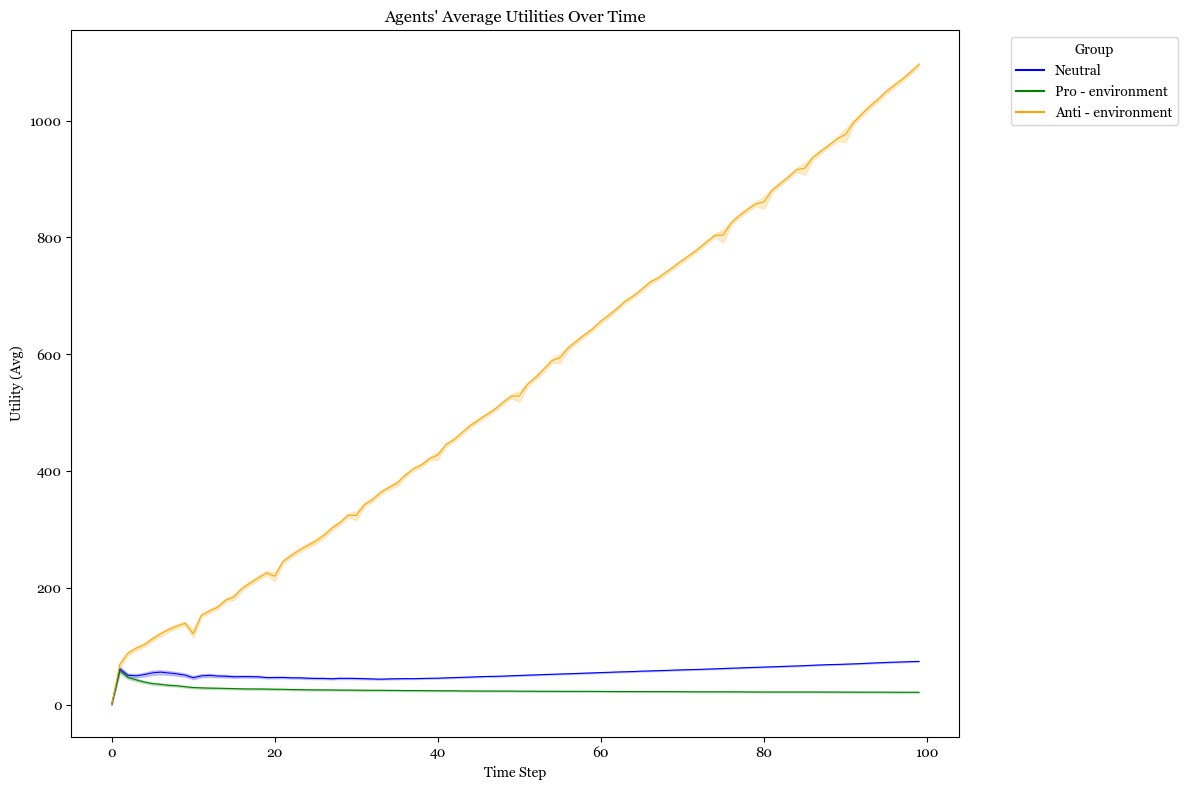

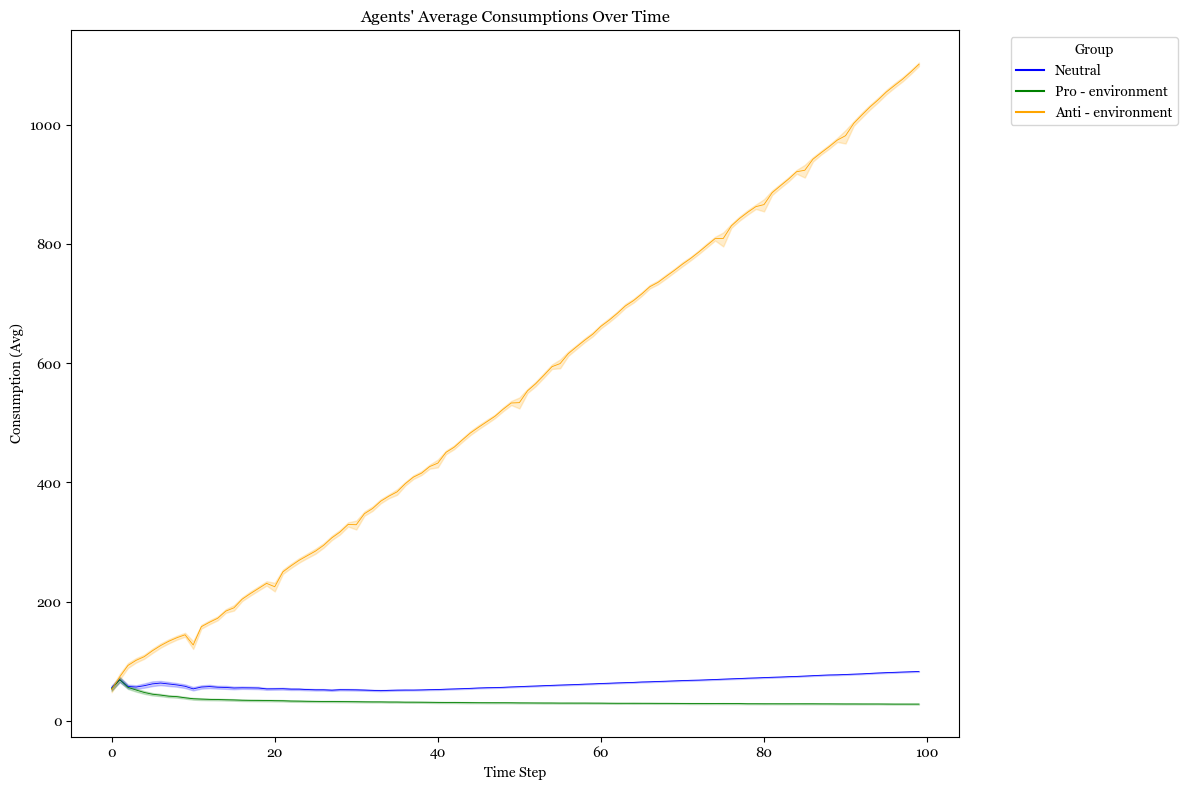

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Retrieve the collected data
agent_data = model.datacollector.get_agent_vars_dataframe()

# Reset index to get agent IDs and steps as columns
agent_data = agent_data.reset_index()

# Ensure no missing values in Utilities (fill with 0 if needed)
agent_data['Utility'] = agent_data['Utility'].fillna(0)

# Plot all agents' utilities over time, colored by group
plt.figure(figsize=(12, 8))
sns.lineplot(data=agent_data, units= "AgentID", x='Step', y='Utility', hue='Group', legend='full', linewidth=0.6, alpha = 0.3, estimator=None, palette= color_dict)
plt.title("All Agents' Utilities Over Time")
plt.xlabel("Time Step")
plt.ylabel("Utility (All agents)")
plt.legend(title='Group', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Plot all agents' consumptions over time, colored by group
plt.figure(figsize=(12, 8))
sns.lineplot(data=agent_data, units= "AgentID", x='Step', y='Consumption', hue='Group', legend='full', linewidth=0.6, alpha = 0.3, estimator=None, palette= color_dict)
plt.title("All Agents' Consumptions Over Time")
plt.xlabel("Time Step")
plt.ylabel("Consumption (All agents)")
plt.legend(title='Group', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Group data by Step and Group for utilities
plt.figure(figsize=(12, 8))
sns.lineplot(data=agent_data, units= None, x='Step', y='Utility', hue='Group', legend='full', linewidth=0.8, alpha = 1, estimator="average", palette= color_dict)
plt.title("Agents' Average Utilities Over Time")
plt.xlabel("Time Step")
plt.ylabel("Utility (Avg)")
plt.legend(title='Group', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Plot all agents' consumptions over time, colored by group
plt.figure(figsize=(12, 8))
sns.lineplot(data=agent_data, units= None, x='Step', y='Consumption', hue='Group', legend='full', linewidth=0.6, alpha = 1, estimator="average", palette= color_dict)
plt.title("Agents' Average Consumptions Over Time")
plt.xlabel("Time Step")
plt.ylabel("Consumption (Avg)")
plt.legend(title='Group', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


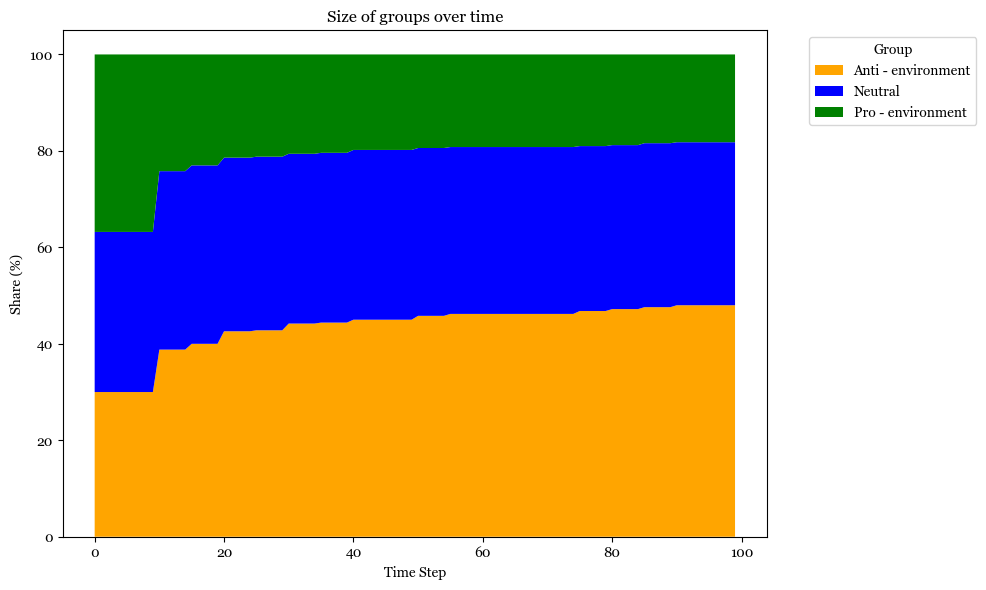

In [5]:
# Count the number of individuals in each group at each `Step`
group_shares = agent_data.groupby(['Step', 'Group'])['AgentID'].count().reset_index()

# Normalize the counts within each `Step` to get shares
group_shares['Share'] = group_shares['AgentID'].apply(lambda x: x * 100 / N)

# Pivot the data to ensure all steps have entries for each group, filling missing values with zero
pivoted_shares = group_shares.pivot(index='Step', columns='Group', values='Share').fillna(0)

# Extract the data for plotting, ensuring they align with `Step`
steps_stack = pivoted_shares.index.tolist()
anti_stack = pivoted_shares.get('Anti - environment', 0).tolist()
neutral_stack = pivoted_shares.get('Neutral', 0).tolist()
pro_stack = pivoted_shares.get('Pro - environment', 0).tolist()

# Plot
plt.figure(figsize=(10, 6))
plt.stackplot(
    steps_stack, 
    anti_stack, 
    neutral_stack, 
    pro_stack, 
    labels=['Anti - environment', 'Neutral', 'Pro - environment'], 
    colors=[color_dict['Anti - environment'], color_dict['Neutral'], color_dict['Pro - environment']]
)
plt.title("Size of groups over time")
plt.xlabel("Time Step")
plt.ylabel("Share (%)")
plt.legend(title='Group', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [6]:
agent_data.head()

,Step,AgentID,Group,Consumption,Utility
0,0,0,Neutral,19.266605,0.0
1,0,1,Pro - environment,32.877726,0.0
2,0,2,Neutral,66.162898,0.0
3,0,3,Pro - environment,42.665132,0.0
4,0,4,Neutral,92.567822,0.0


In [7]:
# Step 0 
step0 = agent_data.loc[agent_data.Step == 0]

# Step 99
step99 = agent_data.loc[agent_data.Step == 99]

In [8]:
step0.Group.value_counts()

Pro - environment     184
Neutral               166
Anti - environment    150
Name: Group, dtype: int64

In [9]:
step99.Group.value_counts()

Anti - environment    240
Neutral               169
Pro - environment      91
Name: Group, dtype: int64

## Now with status

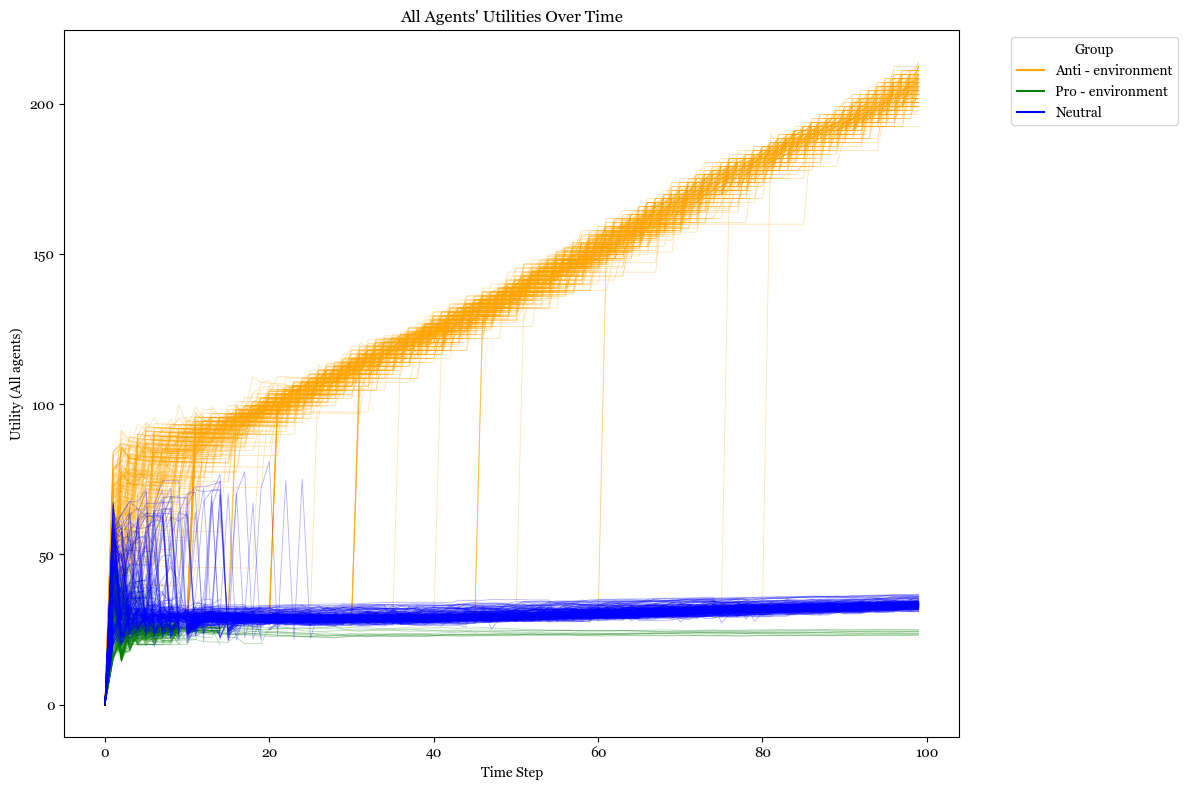

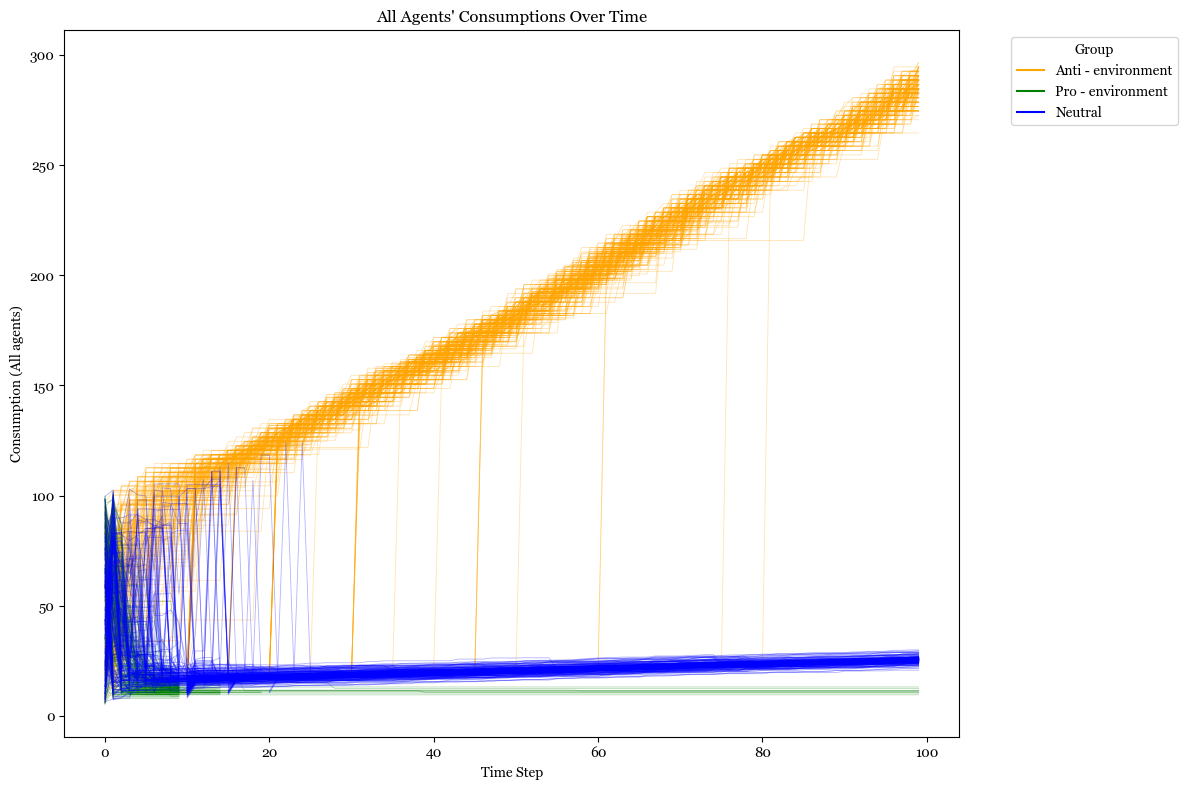

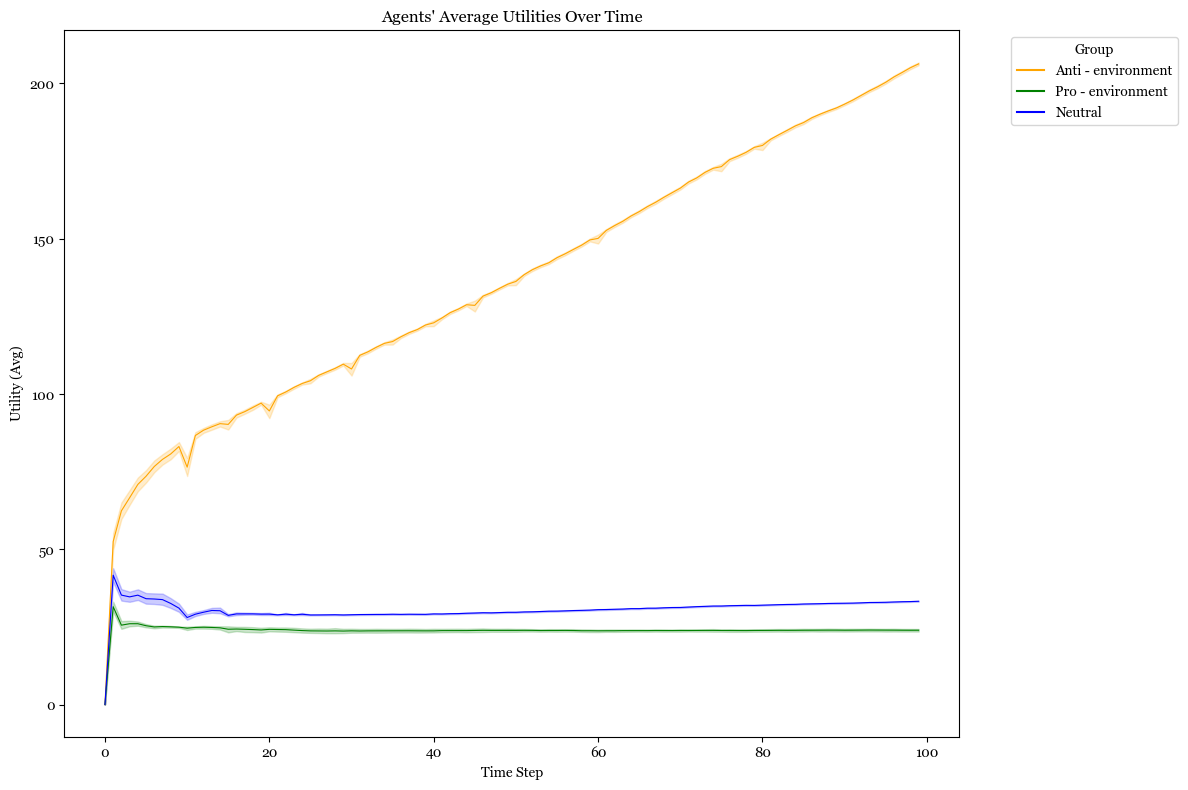

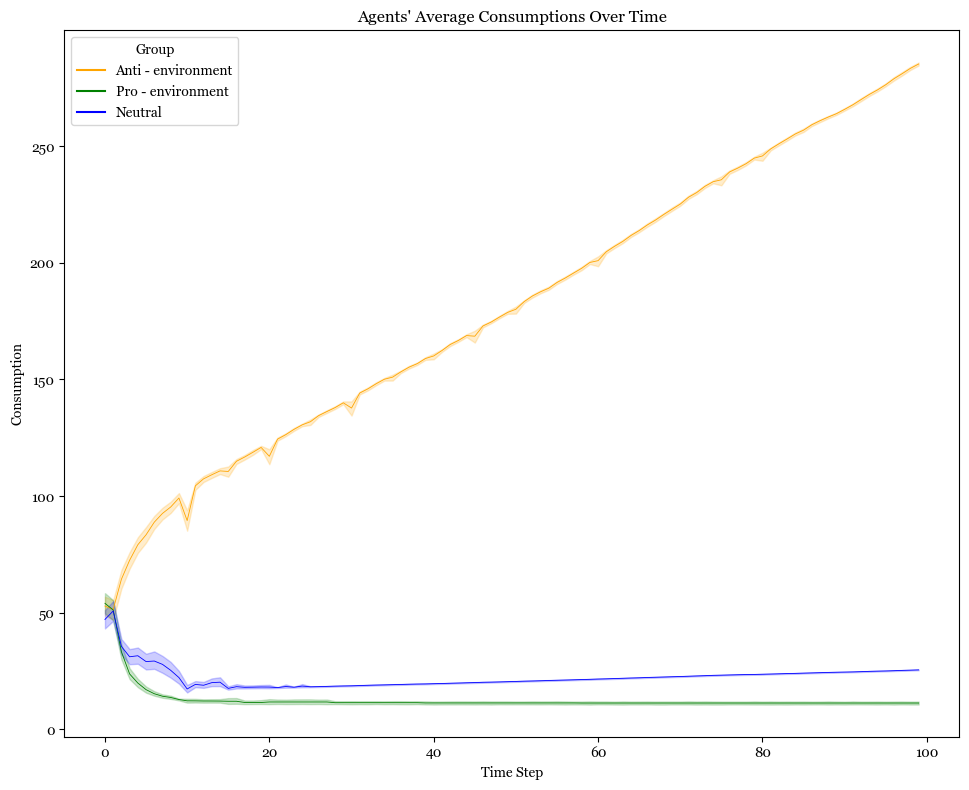

In [10]:
# Set the number of agents and other parameters
N = 500  # Number of agents
lambda1 = 1/2
lambda2 = 1/3
convincement_type = "ranking_relatives"  # Placeholder since you're ignoring this for now

# Initialize the model
model = coordination_model(N, lambda1, lambda2, convincement_type, steps_convincement=5)

# Run the model for a specified number of steps
num_steps = 100
for i in range(num_steps):
    model.step()


# Retrieve the collected data
agent_data = model.datacollector.get_agent_vars_dataframe()

# Reset index to get agent IDs and steps as columns
agent_data = agent_data.reset_index()

# Ensure no missing values in Utilities (fill with 0 if needed)
agent_data['Utility'] = agent_data['Utility'].fillna(0)

# Plot all agents' utilities over time, colored by group
plt.figure(figsize=(12, 8))
sns.lineplot(data=agent_data, units= "AgentID", x='Step', y='Utility', hue='Group', legend='full', linewidth=0.6, alpha = 0.3, estimator=None, palette= color_dict)
plt.title("All Agents' Utilities Over Time")
plt.xlabel("Time Step")
plt.ylabel("Utility (All agents)")
plt.legend(title='Group', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Plot all agents' consumptions over time, colored by group
plt.figure(figsize=(12, 8))
sns.lineplot(data=agent_data, units= "AgentID", x='Step', y='Consumption', hue='Group', legend='full', linewidth=0.6, alpha = 0.3, estimator=None, palette= color_dict)
plt.title("All Agents' Consumptions Over Time")
plt.xlabel("Time Step")
plt.ylabel("Consumption (All agents)")
plt.legend(title='Group', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Group data by Step and Group for utilities
plt.figure(figsize=(12, 8))
sns.lineplot(data=agent_data, units= None, x='Step', y='Utility', hue='Group', legend='full', linewidth=0.8, alpha = 1, estimator="average", palette= color_dict)
plt.title("Agents' Average Utilities Over Time")
plt.xlabel("Time Step")
plt.ylabel("Utility (Avg)")
plt.legend(title='Group', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Plot all agents' consumptions over time, colored by group
plt.figure(figsize=(12, 8))
sns.lineplot(data=agent_data, units= None, x='Step', y='Consumption', hue='Group', legend='full', linewidth=0.6, alpha = 1, estimator="average", palette= color_dict)
plt.title("Agents' Average Consumptions Over Time")
plt.xlabel("Time Step")
plt.legend(title='Group', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.legend(title='Group')
plt.show()


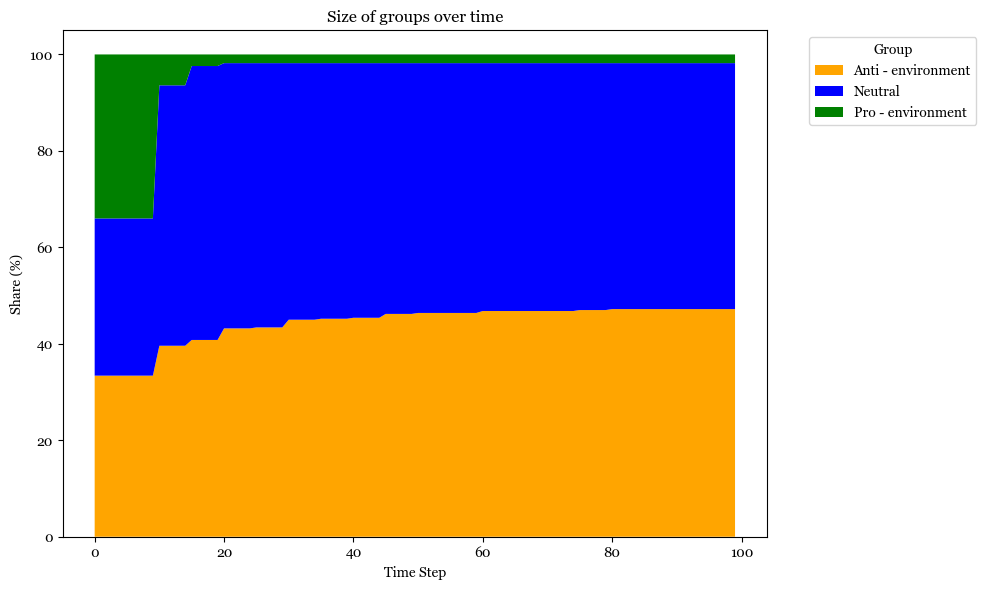

In [11]:
# Count the number of individuals in each group at each `Step`
group_shares = agent_data.groupby(['Step', 'Group'])['AgentID'].count().reset_index()

# Normalize the counts within each `Step` to get shares
group_shares['Share'] = group_shares['AgentID'].apply(lambda x: x * 100 / N)

# Pivot the data to ensure all steps have entries for each group, filling missing values with zero
pivoted_shares = group_shares.pivot(index='Step', columns='Group', values='Share').fillna(0)

# Extract the data for plotting, ensuring they align with `Step`
steps_stack = pivoted_shares.index.tolist()
anti_stack = pivoted_shares.get('Anti - environment', 0).tolist()
neutral_stack = pivoted_shares.get('Neutral', 0).tolist()
pro_stack = pivoted_shares.get('Pro - environment', 0).tolist()

# Plot
plt.figure(figsize=(10, 6))
plt.stackplot(
    steps_stack, 
    anti_stack, 
    neutral_stack, 
    pro_stack, 
    labels=['Anti - environment', 'Neutral', 'Pro - environment'], 
    colors=[color_dict['Anti - environment'], color_dict['Neutral'], color_dict['Pro - environment']]
)
plt.title("Size of groups over time")
plt.xlabel("Time Step")
plt.ylabel("Share (%)")
plt.legend(title='Group', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()